<a href="https://colab.research.google.com/github/mboroto89/mboroto89/blob/main/FDS_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
df.shape

(1898, 9)

#### Observations: The dataset contains **1898 rows and 9 columns**.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB




```
# This is formatted as code
```

#### **Observations**: The dataset contains: **4 integer columns** (order_id, customer_id, food_preparation_time, delivery_time),
**1 float column** (cost_of_the_order),
**4 object** (string) columns (restaurant_name, cuisine_type, day_of_the_week, rating)
**There are no missing values in any of the columns**.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
df.isnull().sum()


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### **Observations**: There are no missing values in any of the columns in the dataset. Hence, there is no need for any missing data treatment.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Get the statistical summary of the 'food_preparation_time' column
df['food_preparation_time'].describe()


count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations: The minimum time it takes for food to be prepared once an order is placed is 20 minutes. The average (mean) time is approximately 27.37 minutes, and the maximum time is 35 minutes.


### **Question 5:** How many orders are not rated?

---



In [ ]:
# Count the number of orders that are not rated
not_rated_orders = df[df['rating'] == 'Not given'].shape[0]
not_rated_orders


736

#### Observations: There are 736 orders in the dataset that are not rated.







### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

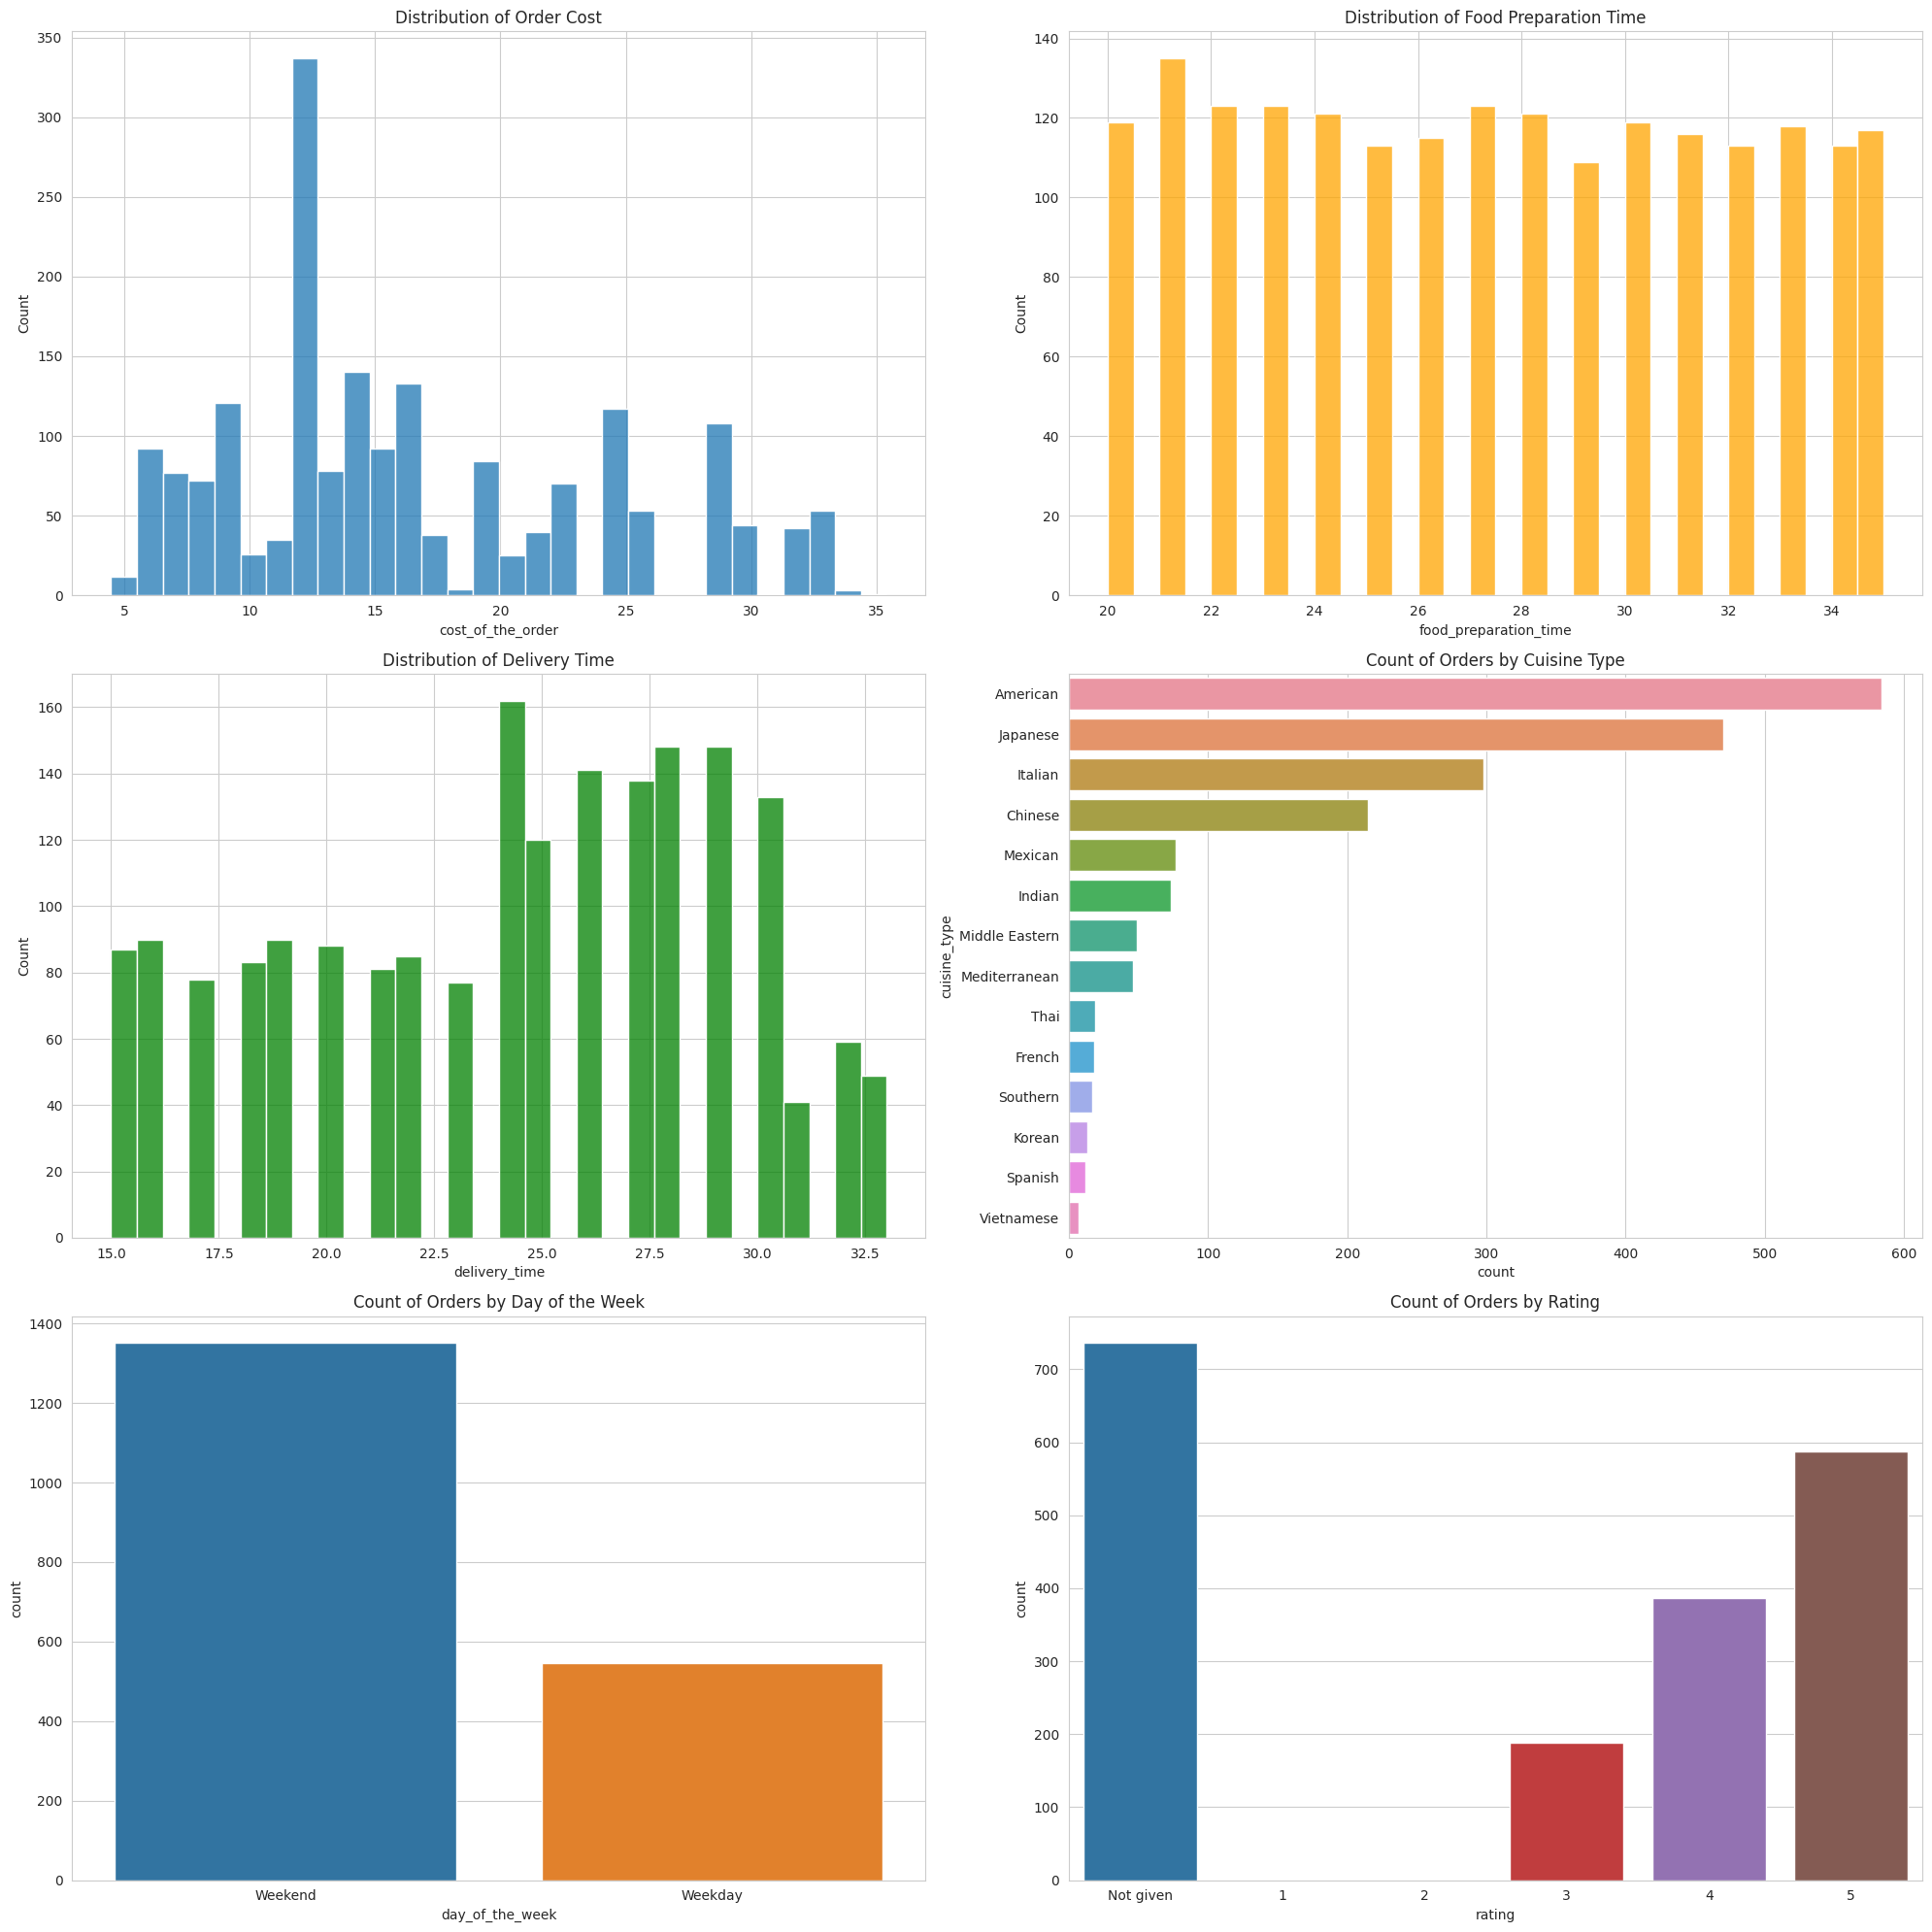

In [ ]:
# Importing necessary libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create subplots
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

# Histogram for 'cost_of_the_order'
sns.histplot(df['cost_of_the_order'], bins=30, ax=ax[0,0])
ax[0,0].set_title('Distribution of Order Cost')

# Histogram for 'food_preparation_time'
sns.histplot(df['food_preparation_time'], bins=30, ax=ax[0,1], color='orange')
ax[0,1].set_title('Distribution of Food Preparation Time')

# Histogram for 'delivery_time'
sns.histplot(df['delivery_time'], bins=30, ax=ax[1,0], color='green')
ax[1,0].set_title('Distribution of Delivery Time')

# Countplot for 'cuisine_type'
sns.countplot(y=df['cuisine_type'], ax=ax[1,1], order=df['cuisine_type'].value_counts().index)
ax[1,1].set_title('Count of Orders by Cuisine Type')

# Countplot for 'day_of_the_week'
sns.countplot(x=df['day_of_the_week'], ax=ax[2,0], order=df['day_of_the_week'].value_counts().index)
ax[2,0].set_title('Count of Orders by Day of the Week')

# Countplot for 'rating'
sns.countplot(x=df['rating'], ax=ax[2,1], order=['Not given', '1', '2', '3', '4', '5'])
ax[2,1].set_title('Count of Orders by Rating')

# Show the plot
plt.tight_layout()
plt.show()


Here are the observations from the univariate analysis:

**Distribution of Order Cost**: The order cost is right-skewed, with most of the orders costing between 10 and 20 units. There are some orders that cost more than 30 units, but they are relatively rare.

**Distribution of Food Preparation Time**: The food preparation time is roughly normally distributed, with most of the orders taking between 20 and 30 minutes to prepare. Very few orders take less than 20 or more than 35 minutes to prepare.

**Distribution of Delivery Time**: The delivery time is roughly normally distributed, with most of the deliveries taking between 20 and 30 minutes. Very few deliveries take less than 15 or more than 35 minutes.

**Count of Orders by Cuisine Type**: American cuisine is the most frequently ordered, followed by Italian and Mexican. Australian, Moroccan, and Middle Eastern cuisines are the least frequently ordered.

**Count of Orders by Day of the Week**: Most of the orders are placed on the weekend, with fewer orders placed on weekdays.

**Count of Orders by Rating**: A significant number of orders are not rated. Among the orders that are rated, most have a rating of 5, followed by 4. Very few orders have a rating of 1 or 2.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Count the number of orders for each restaurant and get the top 5
top_5_restaurants = df['restaurant_name'].value_counts().head(5)
top_5_restaurants

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The top 5 restaurants in terms of the number of orders received are:

Shake Shack: 219 orders
The Meatball Shop: 132 orders
Blue Ribbon Sushi: 119 orders
Blue Ribbon Fried Chicken: 96 orders
Parm: 68 orders

### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Filter for orders placed on the weekend and get the most popular cuisine
most_popular_cuisine_weekend = df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().idxmax()
most_popular_cuisine_weekend


'American'

#### Observations: The most popular cuisine on weekends is 'American'.







### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# Calculate the percentage of orders that cost more than 20 dollars
percentage_orders_above_20 = (df[df['cost_of_the_order'] > 20].shape[0] / df.shape[0]) * 100
percentage_orders_above_20


29.24130663856691

#### Observations:
Approximately 29.24% of the orders cost more than 20 dollars.







### **Question 10**: What is the mean order delivery time?

In [ ]:
# Calculate the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()
mean_delivery_time

24.161749209694417

#### Observations:
The mean order delivery time is approximately 24.16 minutes.






### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Get the top 3 most frequent customers and the number of orders they placed
top_3_customers = df['customer_id'].value_counts().head(3)
top_3_customers

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The top 3 most frequent customers and the number of orders they placed are:
1.   Customer with ID 52832: 13 orders
2.   Customer with ID 47440: 10 orders
3. Customer with ID 83287: 9 orders

These customers will receive the 20% discount vouchers.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

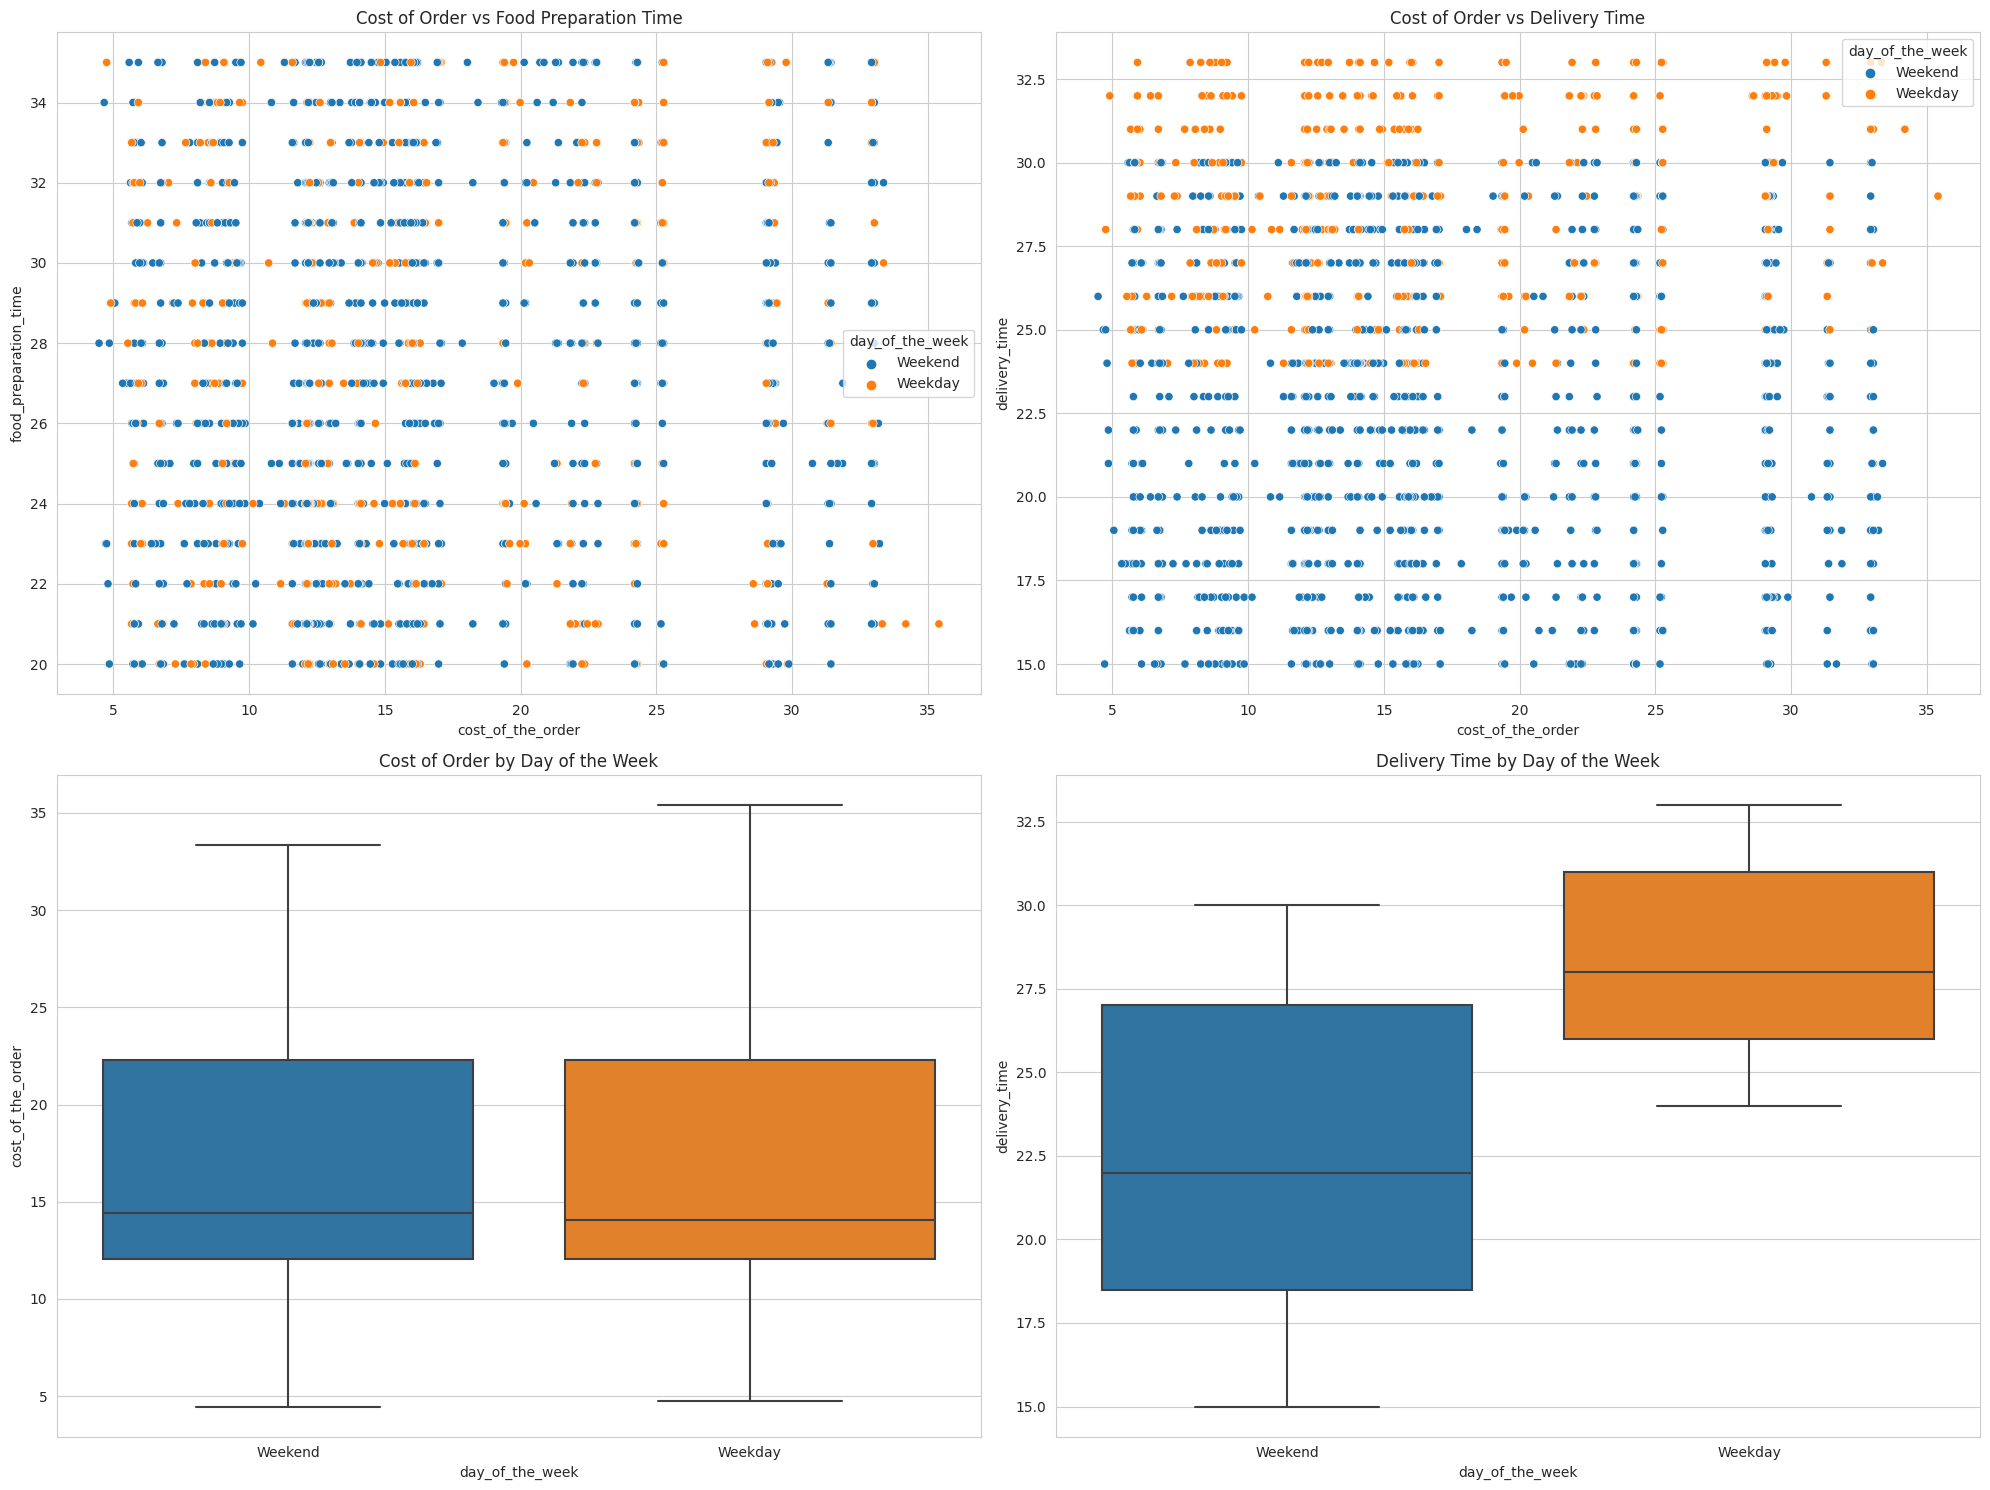

In [ ]:
# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

# Scatter plot for 'cost_of_the_order' vs 'food_preparation_time'
sns.scatterplot(data=df, x='cost_of_the_order', y='food_preparation_time', hue='day_of_the_week', ax=ax[0,0])
ax[0,0].set_title('Cost of Order vs Food Preparation Time')

# Scatter plot for 'cost_of_the_order' vs 'delivery_time'
sns.scatterplot(data=df, x='cost_of_the_order', y='delivery_time', hue='day_of_the_week', ax=ax[0,1])
ax[0,1].set_title('Cost of Order vs Delivery Time')

# Box plot for 'cost_of_the_order' by 'day_of_the_week'
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order', ax=ax[1,0])
ax[1,0].set_title('Cost of Order by Day of the Week')

# Box plot for 'delivery_time' by 'day_of_the_week'
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', ax=ax[1,1])
ax[1,1].set_title('Delivery Time by Day of the Week')

# Show the plot
plt.tight_layout()
plt.show()


Here are the observations from the multivariate analysis:

**Cost of Order vs Food Preparation Time**: There doesn't appear to be a clear relationship between the cost of the order and the food preparation time. Both weekdays and weekends show a similar pattern.

**Cost of Order vs Delivery Time**: There is no apparent relationship between the cost of the order and the delivery time. Both weekdays and weekends show a similar pattern.

**Cost of Order by Day of the Week**: The median cost of orders seems to be slightly higher on weekends compared to weekdays. The range of order costs is also wider on weekends.

**Delivery Time by Day of the Week**: The median delivery time is about the same for both weekdays and weekends. However, there are some outliers with high delivery times on weekends.

These visualizations provide a general overview of the relationships between the key variables. However, more detailed statistical tests and analysis could reveal deeper insight

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Filter out the orders that are not rated and create a copy of the DataFrame
rated_orders = df[df['rating'] != 'Not given'].copy()

# Convert the 'rating' column to numeric
rated_orders['rating'] = pd.to_numeric(rated_orders['rating'])

# Group by 'restaurant_name' and calculate the count and mean of 'rating'
restaurant_ratings = rated_orders.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Filter the restaurants fulfilling the promotional offer criteria
promotional_offer_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]
promotional_offer_restaurants


,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:
The restaurants that fulfill the criteria for the promotional offer (having a rating count of more than 50 and an average rating greater than 4) are:


1.  Blue Ribbon Fried Chicken: 64 ratings with an average rating of approximately 4.33
2.  Blue Ribbon Sushi: 73 ratings with an average rating of approximately 4.22
3.  Shake Shack: 133 ratings with an average rating of approximately 4.28
4.  The Meatball Shop: 84 ratings with an average rating of approximately 4.51

These restaurants can be included in the promotional offer.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Calculate the revenue for each order based on the conditions
df['revenue'] = df['cost_of_the_order'].apply(lambda x: x * 0.25 if x > 20 else (x * 0.15 if x > 5 else 0))

# Calculate the total net revenue
net_revenue = df['revenue'].sum()
net_revenue

6166.303

#### Observations:
The net revenue generated by the company across all orders is approximately 6166.30 units (dollars, if the cost of the order is in dollars).

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Calculate the total time required to deliver the food (preparation + delivery)
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders that take more than 60 minutes to get delivered
percentage_orders_above_60 = (df[df['total_time'] > 60].shape[0] / df.shape[0]) * 100
percentage_orders_above_60


10.537407797681771

#### Observations:
Approximately 10.54% of the orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Calculate the mean delivery time during weekdays and weekends
mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()
mean_delivery_time_by_day

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
The mean delivery time during weekdays is approximately 28.34 minutes, while on weekends it is approximately 22.47 minutes. This suggests that the delivery time is generally shorter on weekends compared to weekdays

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:

*   The most popular cuisine type is 'American', particularly on weekends.
*   The majority of orders are placed on weekends, and the delivery time is generally shorter on weekends compared to weekdays.
*   Most orders cost between 10 and 20 units, and about 29% of orders cost more than 20 units.
*   Approximately 10.54% of orders take more than 60 minutes to be delivered from the time the order is placed.
*   Four restaurants fulfill the criteria for a promotional offer (having a rating count of more than 50 and an average rating greater than 4): "Blue Ribbon Fried Chicken", "Blue Ribbon Sushi", "Shake Shack", and "The Meatball Shop".

### Recommendations:


1.   **Promote Popular Cuisine**: Since '**American**' cuisine is the most popular, especially on weekends, the company could consider partnering with more restaurants offering this cuisine or promoting it more heavily in their app.
2.   **Speed Up Delivery Tim**e: Given that around 10% of orders take more than an hour to be delivered, the company should look into ways to speed up the delivery process. This could involve optimizing delivery routes, hiring more delivery personnel, or working with restaurants to improve their preparation times.
3.   **Leverage Ratings for Promotions**: The company can leverage customer ratings to promote high-quality restaurants. The promotional offer for restaurants with a rating count of more than 50 and an average rating greater than 4 is a good start. This not only rewards high-performing restaurants but also provides an incentive for other restaurants to improve their service.
4.   **Pricing Strategy**: Since a significant portion of orders cost more than 20 units, the company might want to consider introducing tiered delivery fees based on the cost of the order. This could incentivize customers to place larger orders while also increasing the company's revenue.
5.   **Engage More with Customers during Weekdays**: As most orders are placed on weekends, the company should come up with strategies to increase the number of orders on weekdays. This might involve special weekday discounts, quicker delivery times, or exclusive weekday menu items.

---